In [7]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os


import time
from reportlab.lib.enums import TA_JUSTIFY
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, PageBreak
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch


def cartesian_coord(*arrays):
    grid = np.meshgrid(*arrays)        
    coord_list = [entry.ravel() for entry in grid]
    points = np.vstack(coord_list).T
    return points

def get_available_attr(img_list):
    attr_dict = {}
    for img_dir in img_list:
        for attr in img_dir.split('/')[-2].split('@'):
            attr_name, attr_value = attr.split('(')[0], attr.split('(')[1][:-1]
            if attr_name not in attr_dict.keys():
                attr_dict[attr_name] = [attr_value]
            else:
                if attr_value not in attr_dict[attr_name]: 
                    attr_dict[attr_name].append(attr_value)
    return attr_dict


def filter_results(attr_dict):
    interested_imgs = []
    attrs = []
    attr_names = list(attr_dict.keys())
    attr_list= attr_dict.values()
    
    param_combination_list = cartesian_coord(*attr_list)
    
    for i in range(len(param_combination_list)):
        param_comb= param_combination_list[i]
        
        attrs= []
        for j in range(len(param_comb)):
            attr_name = attr_names[j]
            param_value = param_comb[j]
            attrs.append(f'{attr_name}({param_value})')
            
        #print(attrs)
        for img_dir in img_list:
            flag=True
            for attr in attrs:
                #print('check : ',attr.split('('))
                if attr.split('(')[1][:-1]=='all':
                    flag=True
                    continue
                else:
                    if attr not in img_dir:
                        flag= False
                        break
            if flag==True:interested_imgs.append(img_dir)
            #else:print(img_dir)
    print(f'{len(interested_imgs)} images are found !!!')
    return interested_imgs

def show_results(key, dict_img_position, interested_imgs, sort_by_attr_values=None):
    start, end = dict_img_position[key]

    for img_dir in sorted(interested_imgs, key=sort_by_attr_values):
        plt.figure(figsize = (15,5))
        plt.imshow(plt.imread(img_dir)[start:end,:])
        plt.title(img_dir)
        plt.show()

def sort_name_by_epoch(x):
    return int(x.split('/')[-1].split('_')[0])

def find_last_converged_result(img_dir, loss_threshold=0.05):
    img_list = sorted(glob.glob(f"{img_dir}/*.jpg"),key= sort_name_by_epoch, reverse=True)
    for img_dir in img_list:
        loss= float(img_dir.split('(')[-1][:-5])
        
        img= plt.imread(img_dir)
        is_loss_okay= loss< loss_threshold
        is_results_okay= img[100, 300].sum()< 765

        if is_loss_okay and is_results_okay:
            return img_dir
    
    print(f'####   no image found : {img_dir}')
    return None

def find_best_result(img_dir):
    img_list = sorted(glob.glob(f"{img_dir}/*.jpg"),key= sort_name_by_epoch, reverse=True)
    min_loss=1000
    final_img_dir= None
    
    losses=[]
    for img_dir in img_list:
        loss= img_dir.split('(')[-1][:-5]
        if loss!='nan':losses.append(float(loss))
        
    min_loss= min(losses)
    
    for img_dir in img_list:
        loss= img_dir.split('(')[-1][:-5]
        
        img= plt.imread(img_dir)
        is_results_okay= img[100, 300].sum()< 765
        

        if is_results_okay and loss!='nan':
            loss= float(loss)
            if loss<min_loss+0.005:
                return img_dir
                
            
    print(f'####   no image found : {img_dir}')
    return None

def get_img_list(img_dir = 'figs/mnistv6', mode='lowest_loss', loss_threshold=0.05):
    exp_list = sorted(glob.glob(f'{img_dir}/*@*'))
    
    img_dirs=[]
    for idx in range(len(exp_list)):
        #if idx>102:break
        exp_dir = exp_list[idx]
            
        if mode=='last_converged':img_dir = find_last_converged_result(exp_dir, loss_threshold)
        elif mode=='lowest_loss':img_dir = find_best_result(exp_dir)
        
        if idx%100==0:
            print(f'{idx+1}/{len(exp_list)} : {img_dir}')
        
        # exceptions
        #if idx==343:img_dir = find_last_converged_result(exp_dir, 0.130)
        ##
        
        if img_dir==None:
            continue
            
        
        img_dirs.append(img_dir)
    print(f'len img dirs : {len(img_dirs)}')
    return img_dirs
    
    
def sort_by_attr_values(img_dir):
    img_dir= img_dir.split('/')[-2]
    values=[]
    for attr in img_dir.split(')'):
        if attr== '':continue
        values.append(float(attr.split('(')[1]))
    return values



In [ ]:
dict_img_position = {
    'main':[0, 200],
    'ht':[200, 650],
    'loss':[650, 920],
    'overall_results':[930, 1150]}

In [2]:
'''
count=0
new_names = []
for dir_ in os.listdir('figs/mnistv6/'):
    splitted= dir_.split('@')
    new_name= dir_
    if 'img_size' in splitted[0] and 'img_size' in splitted[1]:
        new_name = '@'.join(splitted[1:])

        new_dir_name = f'figs/mnistv6/{new_name}'
        
        os.rename(f'figs/mnistv6/{dir_}', new_dir_name)
    new_names.append(new_name)
    if new_name.split('@')[0]=='img_size(32)':count+=1
    else:print(new_name)
print(count)
'''

"\ncount=0\nnew_names = []\nfor dir_ in os.listdir('figs/mnistv6/'):\n    splitted= dir_.split('@')\n    new_name= dir_\n    if 'img_size' in splitted[0] and 'img_size' in splitted[1]:\n        new_name = '@'.join(splitted[1:])\n\n        new_dir_name = f'figs/mnistv6/{new_name}'\n        \n        os.rename(f'figs/mnistv6/{dir_}', new_dir_name)\n    new_names.append(new_name)\n    if new_name.split('@')[0]=='img_size(32)':count+=1\n    else:print(new_name)\nprint(count)\n"

In [3]:
img_list = get_img_list(img_dir = 'figs/mnistv6', mode='lowest_loss')
#img_list = glob.glob('figs/mnistv6/*/10_*.jpg')

print(len(img_list))
get_available_attr(img_list)

1/1512 : figs/mnistv6/img_size(128)@T(1)@rotation_lambda(10.0)@lr_H(0.0)@lambda_scale_factor(1)/150_L1Loss(0.065).jpg
101/1512 : figs/mnistv6/img_size(128)@T(16)@rotation_lambda(10.0)@lr_H(0.1)@lambda_scale_factor(1)/150_L1Loss(0.029).jpg
201/1512 : figs/mnistv6/img_size(128)@T(2)@rotation_lambda(100.0)@lr_H(0.0001)@lambda_scale_factor(1)/150_L1Loss(0.023).jpg
301/1512 : figs/mnistv6/img_size(128)@T(32)@rotation_lambda(100.0)@lr_H(1.0)@lambda_scale_factor(1)/150_L1Loss(0.015).jpg
401/1512 : figs/mnistv6/img_size(128)@T(4)@rotation_lambda(1000.0)@lr_H(0.001)@lambda_scale_factor(1)/150_L1Loss(0.018).jpg
501/1512 : figs/mnistv6/img_size(128)@T(8)@rotation_lambda(1000.0)@lr_H(10.0)@lambda_scale_factor(1)/145_L1Loss(0.015).jpg
601/1512 : figs/mnistv6/img_size(32)@T(16)@rotation_lambda(10.0)@lr_H(0.01)@lambda_scale_factor(1)/150_L1Loss(0.029).jpg
701/1512 : figs/mnistv6/img_size(32)@T(2)@rotation_lambda(100.0)@lr_H(0.0)@lambda_scale_factor(1)/150_L1Loss(0.026).jpg
801/1512 : figs/mnistv6/img

{'img_size': ['128', '32', '64'],
 'T': ['1', '16', '2', '32', '4', '8'],
 'rotation_lambda': ['10.0', '100.0', '1000.0'],
 'lr_H': ['0.0', '0.0001', '0.001', '0.01', '0.1', '1.0', '10.0'],
 'lambda_scale_factor': ['1', '2', '3', '4']}

In [38]:
dict_ = {'img_size': ['128', '32', '64'],
 'T': ['1', '16', '2', '32', '4', '8'],
 'rotation_lambda': ['10.0', '100.0', '1000.0'],
 'lr_H': ['0.0', '0.0001', '0.001', '0.01', '0.1', '1.0', '10.0'],
 'lambda_scale_factor': ['1', '2', '3', '4']}

In [39]:
interested_imgs = filter_results(dict_)
print(f'available keys : {list(dict_img_position.keys())}')

1512 images are found !!!
available keys : ['main', 'ht', 'loss', 'overall_results']


In [ ]:
show_results('main', dict_img_position, interested_imgs,  sort_by_attr_values)
show_results('loss', dict_img_position, interested_imgs,  sort_by_attr_values)
#show_results('ht', dict_img_position, interested_imgs,  sort_by_attr_values)
#show_results('overall_results', dict_img_position, interested_imgs,  sort_by_attr_values)

## Save to pdf

In [86]:
def save_imgs2pdf(img_dir_list, sorting_function, pdf_filename, attr_dict=None):
    img_dir_list_sorted = sorted(img_dir_list, key = sorting_function)
    doc = SimpleDocTemplate(pdf_filename,pagesize=letter,
                            rightMargin=72,leftMargin=72,
                            topMargin=72,bottomMargin=18)
    Story=[]
    
    styles=getSampleStyleSheet()
    styles.add(ParagraphStyle(name='Justify', alignment=TA_JUSTIFY))
    
    if attr_dict!=None:
        title = '<font size="25">%s</font>' % "Experiment hyperparameters"
        Story.append(Paragraph(title, styles["Normal"]))
        Story.append(Spacer(1, 50))
        
        for (k, v) in attr_dict.items():
            entry = f'{str(k)} : {str(sorted(v))}'
            attr = '<font size="15">%s</font>' % entry
            Story.append(Paragraph(attr, styles["Normal"], bulletText='-'))
            Story.append(Spacer(1, 30))
        
        Story.append(PageBreak())
        

    for idx in range(len(img_dir_list)):
        img_name= img_dir_list_sorted[idx]
        
        img_dir_name= img_name.split('/')[-2]
        ptext = '<font size="7">%s</font>' % img_dir_name
        Story.append(Paragraph(ptext, styles["Normal"])) 
        Story.append(Spacer(1, 10))
        
        ptext = '<font size="12">%s</font>' % img_name
        Story.append(Paragraph(ptext, styles["Normal"])) 
        Story.append(Spacer(1, 30))
        
        im = Image(img_name, 8*inch, 8*inch)
        Story.append(im)
        Story.append(PageBreak())
    doc.build(Story)


In [87]:
save_imgs2pdf(interested_imgs, sorting_function= sort_by_attr_values, pdf_filename='figs/mnistv6/results.pdf', attr_dict= dict_)

## Generate heat maps

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

img_list = get_img_list(img_dir = 'figs/mnistv6', mode='lowest_loss')

In [31]:
def imgdir2metric(imgdir):
    metric = float(imgdir.split('(')[-1][:-5])
    return metric

def create_metric_map(dict_, lambda_scale_factor=1, img_size=32):
    dict_['lambda_scale_factor']= [str(lambda_scale_factor)]
    dict_['img_size']= [str(img_size)]
    
    print('lambda scale factor : ',dict_['lambda_scale_factor'])
    print('img_size : ',dict_['img_size'])
    
    interested_imgs = filter_results(dict_)

    Ts= sorted(dict_['T'], key =float)
    rotation_lambdas = sorted(dict_['rotation_lambda'], key= float)
    
    metric_map = np.ones((len(Ts),len(rotation_lambdas)), dtype='float')
    for i in range(len(Ts)):
        T= Ts[i]
        for j in range(len(rotation_lambdas)):
            rotation_lambda= rotation_lambdas[j]

            valid_img_dirs=[]
            for img_dir in interested_imgs:
                if f'T({T})' in img_dir and f'rotation_lambda({rotation_lambda})' in img_dir:valid_img_dirs.append(img_dir)


            sorted_valid_img_dirs= sorted(valid_img_dirs, key= imgdir2metric)
            selected_img_dir = sorted_valid_img_dirs[0]

            metric_value = imgdir2metric(selected_img_dir)
            metric_map[i, j]= metric_value
                
    return metric_map, Ts, rotation_lambdas

def plot_heatmap(metric_map_highlrH, metric_map_lowlrH, vmin, vmax, x_ticks, y_ticks, lambda_scale_factor, img_size):
    plt.figure(figsize= (15,3))
    plt.subplot(1,2,1)
    ax = sns.heatmap(metric_map_highlrH, linewidth=0.5, annot=True, vmin=vmin, vmax= vmax)
    plt.xticks(range(len(y_ticks)), y_ticks, rotation=0)
    plt.xlabel('K')
    plt.yticks(range(len(x_ticks)), x_ticks, rotation=0)
    plt.ylabel('T')
    plt.title('Ht is learnable')
    
    plt.subplot(1,2,2)
    ax = sns.heatmap(metric_map_lowlrH, linewidth=0.5, annot=True, vmin=vmin, vmax= vmax)
    plt.xticks(range(len(y_ticks)), y_ticks, rotation=0)
    plt.xlabel('K')
    plt.yticks(range(len(x_ticks)), x_ticks, rotation=0)
    plt.ylabel('T')
    plt.title('Ht is fixed')
    
    plt.suptitle(f'lambda scale factor : {lambda_scale_factor} | img_size : {img_size}')
    plt.show()
    
def plot_all_heat_maps(attr_dict_highlrH, attr_dict_lowlrH, lambda_scale_factor=1, img_size=32):
    map_highlrH, xticks_highlrH, yticks_highlrH = create_metric_map(attr_dict_highlrH, lambda_scale_factor=lambda_scale_factor, img_size= img_size)
    map_lowlrH, xticks_lowlrH, yticks_lowlrH = create_metric_map(attr_dict_lowlrH, lambda_scale_factor=lambda_scale_factor, img_size= img_size)
    
    assert xticks_highlrH== xticks_lowlrH, 'Missing lowLR/ highHR images'
    assert yticks_highlrH== yticks_lowlrH, 'Missing lowLR/ highHR images'

    vmin = min(map_highlrH.min(), map_lowlrH.min())
    vmax =  max(map_highlrH.max(), map_lowlrH.max())

    plot_heatmap(map_highlrH, map_lowlrH, vmin, vmax, xticks_highlrH, yticks_highlrH, lambda_scale_factor, img_size)


lambda scale factor :  ['1']
img_size :  ['32']
108 images are found !!!
lambda scale factor :  ['1']
img_size :  ['32']
18 images are found !!!


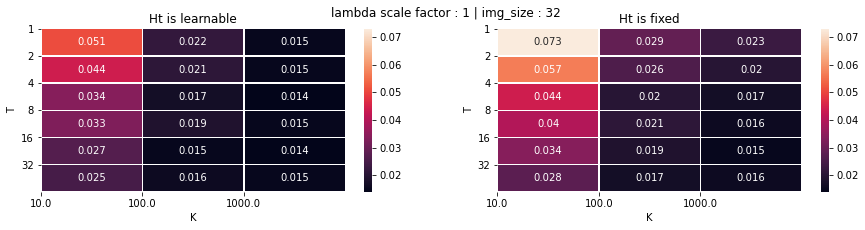

lambda scale factor :  ['2']
img_size :  ['32']
108 images are found !!!
lambda scale factor :  ['2']
img_size :  ['32']
18 images are found !!!


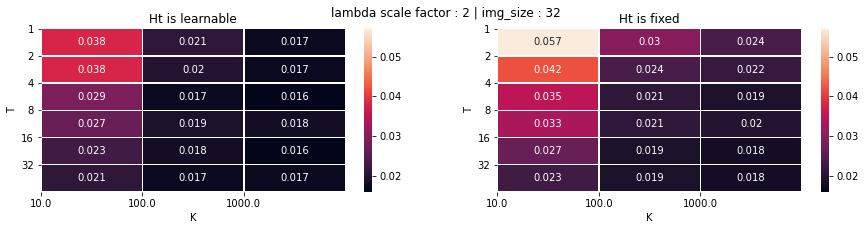

lambda scale factor :  ['3']
img_size :  ['32']
108 images are found !!!
lambda scale factor :  ['3']
img_size :  ['32']
18 images are found !!!


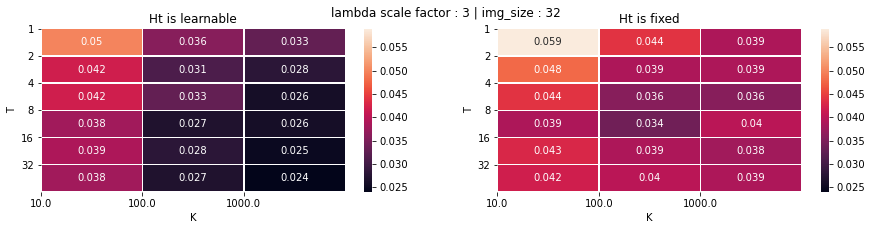

lambda scale factor :  ['4']
img_size :  ['32']
108 images are found !!!
lambda scale factor :  ['4']
img_size :  ['32']
18 images are found !!!


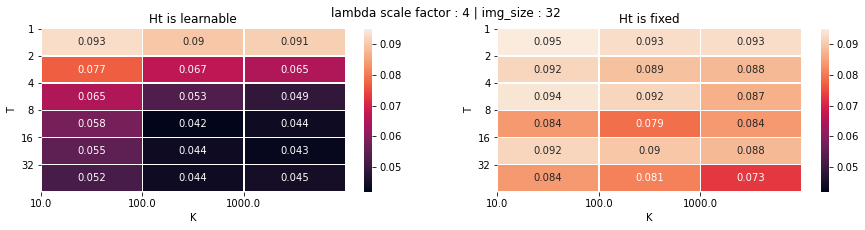

lambda scale factor :  ['1']
img_size :  ['64']
108 images are found !!!
lambda scale factor :  ['1']
img_size :  ['64']
18 images are found !!!


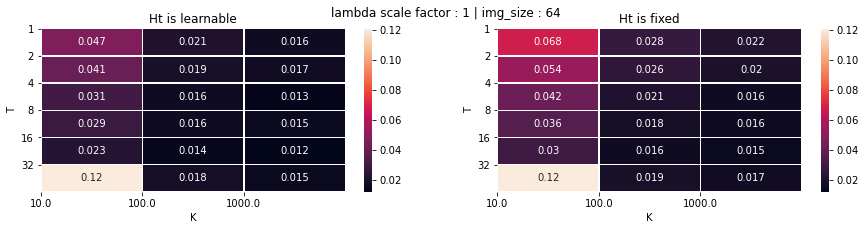

lambda scale factor :  ['2']
img_size :  ['64']
108 images are found !!!
lambda scale factor :  ['2']
img_size :  ['64']
18 images are found !!!


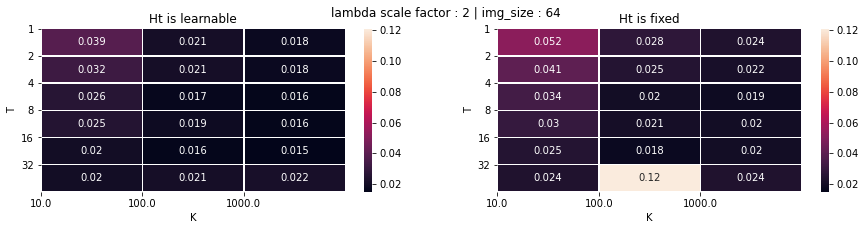

lambda scale factor :  ['3']
img_size :  ['64']
108 images are found !!!
lambda scale factor :  ['3']
img_size :  ['64']
18 images are found !!!


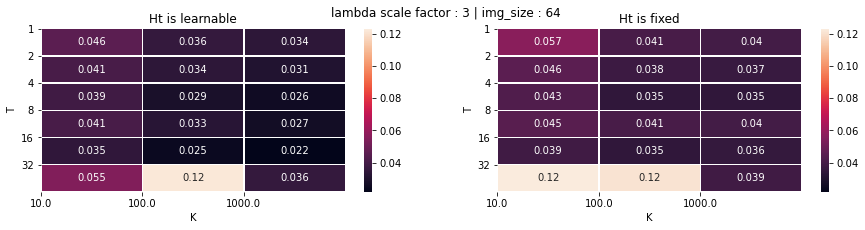

lambda scale factor :  ['4']
img_size :  ['64']
108 images are found !!!
lambda scale factor :  ['4']
img_size :  ['64']
18 images are found !!!


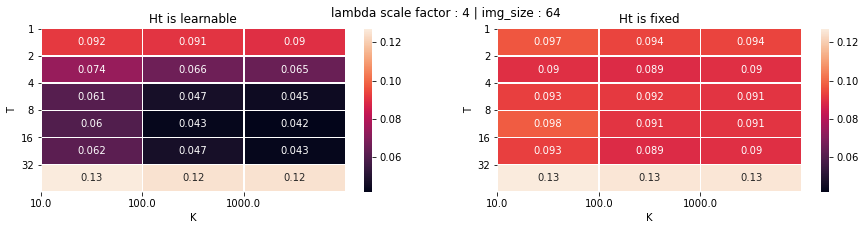

lambda scale factor :  ['1']
img_size :  ['128']
108 images are found !!!
lambda scale factor :  ['1']
img_size :  ['128']
18 images are found !!!


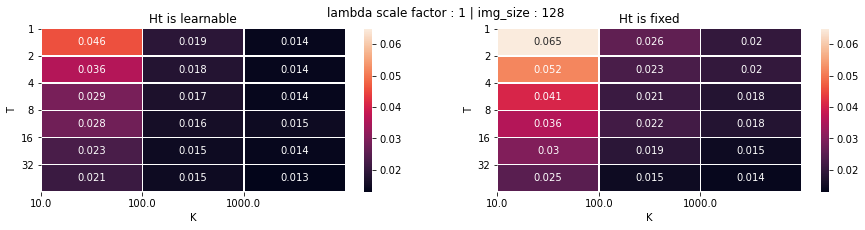

lambda scale factor :  ['2']
img_size :  ['128']
108 images are found !!!
lambda scale factor :  ['2']
img_size :  ['128']
18 images are found !!!


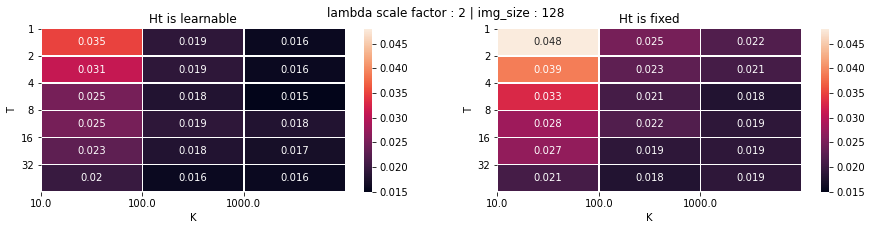

lambda scale factor :  ['3']
img_size :  ['128']
108 images are found !!!
lambda scale factor :  ['3']
img_size :  ['128']
18 images are found !!!


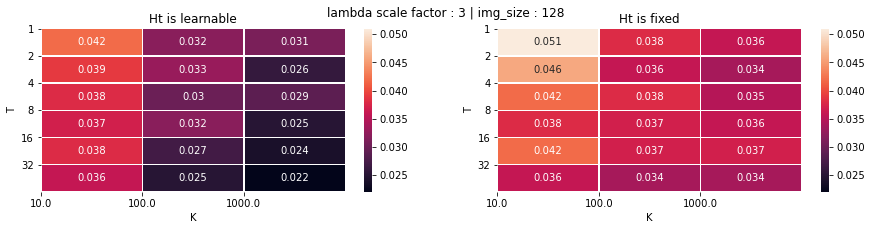

lambda scale factor :  ['4']
img_size :  ['128']
108 images are found !!!
lambda scale factor :  ['4']
img_size :  ['128']
18 images are found !!!


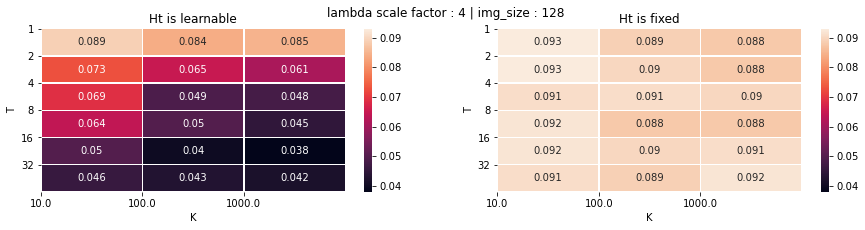

In [33]:
attr_dict_highlrH = {
         'lr_H': ['0.0001', '0.001', '0.01', '0.1', '1.0', '10.0'],
         'T': ['1', '16', '2', '32', '4', '8'],
         'rotation_lambda': ['10.0', '100.0', '1000.0']}

attr_dict_lowlrH = {
         'lr_H': ['0.0'],
         'T': ['1', '16', '2', '32', '4', '8'],
         'rotation_lambda': ['10.0', '100.0', '1000.0']}

for img_size in [32, 64, 128]:
    for lambda_scale_factor in [1,2,3,4]:
        plot_all_heat_maps(attr_dict_highlrH, attr_dict_lowlrH, lambda_scale_factor=lambda_scale_factor, img_size= img_size)